In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
nrow = 150
ncol = 150

train_data_dir = './train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=1000,
                        class_mode='sparse')

test_data_dir = './test'
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=300,
                        class_mode='sparse')

# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

Found 3000 images belonging to 3 classes.
Found 900 images belonging to 3 classes.


In [4]:
Xtr, ytr = train_generator.next()
Xts, yts = test_generator.next()
Xtr_gray = np.dot(Xtr,[0.299,0.587,0.114]).reshape((1000,nrow*ncol))
Xts_gray = np.dot(Xts,[0.299,0.587,0.114]).reshape((300,nrow*ncol))

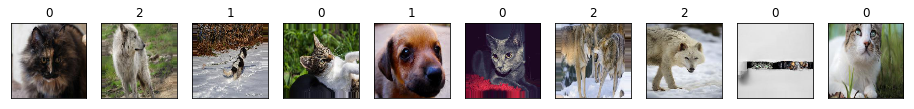

In [5]:
plt.figure(figsize=(16,16))
for i in range(10):   
    plt.subplot(1,10,i+1)
    disp_image(Xtr[i])
    plt.title(int(ytr[i]))
#0--cat
#1--dog
#2--wolf

# SVM

In [6]:
from sklearn import svm

Xtr_s = Xtr.reshape((1000,nrow*ncol*3))
Xts_s = Xts.reshape((300,nrow*ncol*3))

C_test = [0.1,1,10]
gam_test = [0.001,0.01,0.1]

nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))

# Measure and print the accuracy for each C and gamma value.  Store the results in acc
for i in range(nC):
    for j in range(ngam):
        svc = svm.SVC(kernel='rbf',C=C_test[i],gamma=gam_test[j])
        svc.fit(Xtr_s,ytr)
        yhat_ts = svc.predict(Xts_s)
        acc[i][j] = np.mean(yhat_ts == yts)
        
# Print the maximum accuracy and the corresponding best C and gamma
C_best = C_test[np.where(acc==np.max(acc))[0][0]]
gam_best = gam_test[np.where(acc==np.max(acc))[1][0]]
print('The maximum accuracy is',np.max(acc))
print('The corresponding best C and gamma are',C_best,'and',gam_best)

The maximum accuracy is 0.45
The corresponding best C and gamma are 10 and 0.001


# PCA

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(Xtr_gray)
Xtr_scl = scaler.transform(Xtr_gray)

pca = PCA(n_components=0.95,svd_solver='full')
pca.fit(Xtr_scl)
Ztr = pca.transform(Xtr_scl)

logreg = LogisticRegression(multi_class='auto',solver='newton-cg')
logreg.fit(Ztr,ytr)

Xts_scl = scaler.transform(Xts_gray)
Zts = pca.transform(Xts_scl)
yhat = logreg.predict(Zts)

acc = np.mean(yhat==yts)
acc

0.37333333333333335